# <center>Weighted K-Means Clustering of GPS Coordinates - Python.</center>

This is a continuation of my previous post - Clustering GPS Coordinates and Forming Regions with Python. After clustering GPS coordinates, the next question was how can other variable influence the clustering. If you're dealing with sales data - how can we cluster regions by sales and location.

For this I've also used data from kaggle 's Zillow Prize: Zillow's Home Value Prediction (Zestimate). I used 'properties_2016.csv'. It's still large!
In this we'll form coordinates based on the area of the lot in square feet.

## Import pre-requisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

## Load File

In [2]:
df = pd.read_csv('properties_2016.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


## <center>Clustering GPS Co-ordinates to Form Regions - Unweighted </center>

## Create an Elbow Curve to Get the Optimal Number of Clusters- Unweighted

This might take a while.. Stretch a little.

#### Drop rows where the Longitude and/or Latitude have null values

In [4]:
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [5]:
# Variable with the Longitude and Latitude
X=df.loc[:,['parcelid','latitude','longitude']]

In [6]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['latitude']]
X_axis = df[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

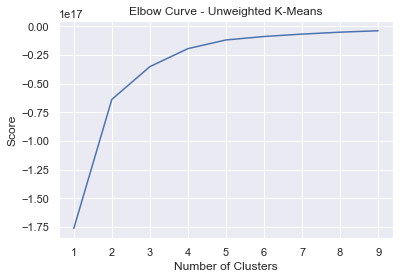

In [7]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve - Unweighted K-Means')

plt.show()

When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

## Create Clusters and Visualise - Unweighted

Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Form Regions - Unweighted')

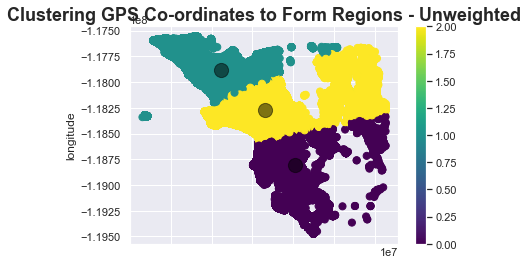

In [8]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

#Visualise Resutls
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering GPS Co-ordinates to Form Regions - Unweighted',fontsize=18, fontweight='bold')


----------------------------------------------------------------------------------------------------------------------------

# <center> Weighted Clustering </center>

## Drop Nulls where the Longitude, Latitude and/or lotsizesquarefeet have null values 

In [9]:
df.dropna(axis=0,how='any',subset=['latitude','longitude','lotsizesquarefeet'],inplace=True)

In [10]:
# Variable with the Longitude and Latitude
X_weighted =df.loc[:,['parcelid','latitude','longitude','lotsizesquarefeet']]

In [11]:
X_weighted.head(3)

,parcelid,latitude,longitude,lotsizesquarefeet
0,10754147,34144442.0,-118654084.0,85768.0
1,10759547,34140430.0,-118625364.0,4083.0
2,10843547,33989359.0,-118394633.0,63085.0


# Create an elbow curve to select the optimal number of clusters - Weighted Clustering

This might take a while.. Stretch a little...or something.

In [12]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

lat_long = X_weighted[X_weighted.columns[1:3]]
lot_size = X_weighted[X_weighted.columns[3]]

sample_weight = lot_size

score = [kmeans[i].fit(lat_long, sample_weight = lot_size).score(lat_long) for i in range(len(kmeans))]

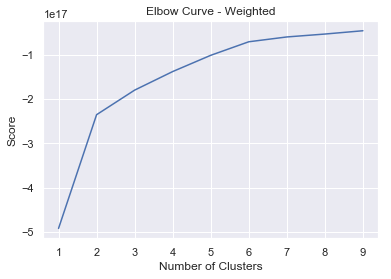

In [13]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve - Weighted')

plt.show()

When we graph the plot, we see that the graph levels off slowly after 2 clusters. 
This implies that addition of more clusters will not help us that much.
This is already different from what we had without using the weights

### Weighted Clustering using 3 as the optimal clusters
This is to see the difference between the 2 without changing the number of clusters

Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Form Regions - Weighted')

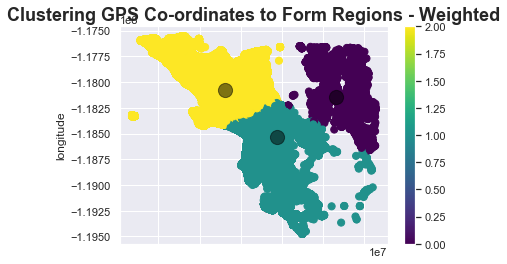

In [14]:
kmeans = KMeans(n_clusters = 3, max_iter=1000, init ='k-means++')

lat_long = X_weighted[X_weighted.columns[1:3]]
lot_size = X_weighted[X_weighted.columns[3]]
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
X_weighted['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = X_weighted['cluster_label'] # Labels of each point

X_weighted.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering GPS Co-ordinates to Form Regions - Weighted',fontsize=18, fontweight='bold')

## Compute and Visualise Results - Using Optimal Weighted Clusters
Let's visualize the results by plotting the data colored by these labels. 
We will also plot the cluster centers as determined by the k-means estimator:

Text(0.5, 1.0, 'Optimal Clustering GPS Co-ordinates to Form Regions - Weighted')

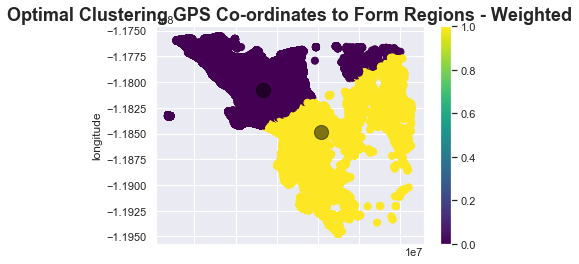

In [15]:
kmeans = KMeans(n_clusters = 2, max_iter=1000, init ='k-means++')

lat_long = X_weighted[X_weighted.columns[1:3]]
lot_size = X_weighted[X_weighted.columns[3]]
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
X_weighted['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = X_weighted['cluster_label'] # Labels of each point

X_weighted.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Optimal Clustering GPS Co-ordinates to Form Regions - Weighted',fontsize=18, fontweight='bold')

## Merge Results with the all of your data
We have to merge our existing data to include the clusters so we can do more analysis. We have two variables containing our data, 'df' and 'X'. Let's see what they look like before.

In [16]:
df.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


In [17]:
X_weighted.head(2)

,parcelid,latitude,longitude,lotsizesquarefeet,cluster_label
0,10754147,34144442.0,-118654084.0,85768.0,1
1,10759547,34140430.0,-118625364.0,4083.0,1


Let's remove the longitude and latitudes from 'X' since they already exist on 'df'.
If we don't remove the longitude and latitude column, we'll have 2 other columns created for longitude and latitude in our data frame. We don't want that.

In [18]:
X_weighted = X_weighted[['parcelid','cluster_label']]
X_weighted.head(2)

,parcelid,cluster_label
0,10754147,1
1,10759547,1


In [19]:
clustered_data = df.merge(X_weighted, left_on='parcelid', right_on='parcelid')

clustered_data.head(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,cluster_label
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,1
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,1
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN,1
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN,1
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN,1


## Export the Data Frame to a CSV

Fortunately there's a 'pandas.DataFrame.to_csv' function.

In [20]:
clustered_data.to_csv ('clustered_data.csv', index=None, header = True)

## <center> Bonus - How to get the Centers. </center>
These are the centers of the clusters that have been created. i.e the centers of the regions.

In [21]:
centers = kmeans.cluster_centers_
print(centers)

[[ 3.39142359e+07 -1.18072066e+08]
 [ 3.42688501e+07 -1.18483582e+08]]


<h1><center>Thank you for reading and ... Good Luck!</center></h1>